In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Read and plot EPA and Purple site

"""
__author__ = "Nastaran Moghimi"
__copyright__ = "Copyright 2017, UCAR/NOAA"
__license__ = "GPL"
__version__ = "1.0"
__email__ = "nastrann.moghimi@gmail.com"



import matplotlib.pyplot as plt
import numpy as np
import os,sys
import datetime
import string
import pandas as pd
#import geopandas as gpd
#import fiona


#live maps
import folium
#import mplleaflet

#static maps
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import (LONGITUDE_FORMATTER,
                                   LATITUDE_FORMATTER)
import cartopy.feature as cfeature 
from matplotlib.offsetbox import AnchoredText



In [2]:
###functions
def get_ind(lim,lons,lats):

    
    [ind] = np.where((lons > lim['xmin']) & 
                    ( lons < lim['xmax']) & 
                    ( lats > lim['ymin']) & 
                    ( lats < lim['ymax']))
    
    return ind


def make_map(projection=ccrs.PlateCarree()):                                                                                                                                        
                                                                                           
    """                                                                          
    Generate fig and ax using cartopy                                                                    
    input: projection                                                                                    
    output: fig and ax                             
    """                                  
    alpha = 0.5                                        
    subplot_kw = dict(projection=projection)                        
    fig, ax = plt.subplots(figsize=(9, 13),                           
                           subplot_kw=subplot_kw)   
    gl = ax.gridlines(draw_labels=True)                                 
    gl.xlabels_top = gl.ylabels_right = False 
    gl.xformatter = LONGITUDE_FORMATTER                        
    gl.yformatter = LATITUDE_FORMATTER                                
                                    
        # Put a background image on for nice sea rendering.             
    ax.stock_img()                                   
                                                          
    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(                      
        category='cultural',                  
        name='admin_1_states_provinces_lines',
        scale='50m',           
        facecolor='none')        

    SOURCE = 'Natural Earth'
    LICENSE = 'public domain'
                                                                                                                                                                                    
    ax.add_feature(cfeature.LAND,zorder=0,alpha=alpha)          
    ax.add_feature(cfeature.COASTLINE,zorder=1,alpha=alpha)
    ax.add_feature(cfeature.BORDERS,zorder=1,alpha=2*alpha)
                       
    ax.add_feature(states_provinces, edgecolor='gray',zorder=1)
                                                          
    # Add a text annotation for the license information to the
    # the bottom right corner.                                            
    text = AnchoredText(r'$\mathcircled{{c}}$ {}; license: {}'
                        ''.format(SOURCE, LICENSE),
                        loc=4, prop={'size': 9}, frameon=True)                                    
    ax.add_artist(text)                                                                           
                                         
    ax.set_xlim(-132,-65)  #lon limits           
    ax.set_ylim( 20 , 55)  #lat limits   
    return fig, ax


In [3]:

#### MAIN
#us
lim = {}
lim['xmin']  = -125.0
lim['xmax']  = -55.
lim['ymin']  =  15.0
lim['ymax']  =  46.3


#texas
lim['xmin']  = -107.0
lim['xmax']  = -93.5
lim['ymin']  =  25.1
lim['ymax']  =  36.6



Read ...
get index ...
Static Cartopy map ...


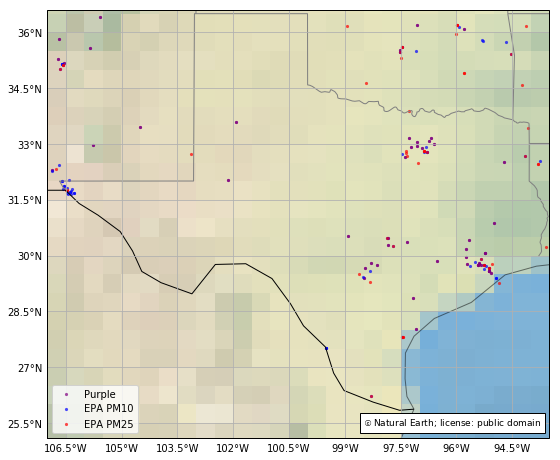

In [4]:
inp_dir = 'inp/'


print 'Read ...'
#read purple exel file                                                                                                                                                              
purple_stations_info_file = inp_dir + 'PurpleAir_Locations.xlsx'
purp_infos = pd.read_excel(purple_stations_info_file)

#read EPA locations from csv                                                                                                                                                         
epa_pm10_info_file = inp_dir + 'PM10.csv'
epa_pm10_locs      = pd.read_csv(epa_pm10_info_file)

epa_pm25_info_file = inp_dir + 'PM25.csv'
epa_pm25_locs      = pd.read_csv(epa_pm25_info_file)


print 'get index ...'
#get index of obs sites inside epecific window LIM
purp_ind     = get_ind(lim=lim,lons=purp_infos   ['Lon'][:],lats=purp_infos   ['Lat'][:])
epa_ind_pm10 = get_ind(lim=lim,lons=epa_pm10_locs['lon'][:],lats=epa_pm10_locs['lat'][:])
epa_ind_pm25 = get_ind(lim=lim,lons=epa_pm25_locs['lon'][:],lats=epa_pm25_locs['lat'][:])


#plot stations
print 'Static Cartopy map ...'
fig,ax = make_map()                                             
ax.scatter(x=purp_infos['Lon'][purp_ind]          ,y=purp_infos['Lat'][purp_ind]          ,s=10,c='purple',lw=0,label = 'Purple' ,alpha=0.7)                                                                                           
ax.scatter(x=epa_pm10_locs['lon'][epa_ind_pm10]  ,y=epa_pm10_locs['lat'] [epa_ind_pm10]   ,s=10,c='blue'  ,lw=0,label = 'EPA PM10',alpha=0.7)
ax.scatter(x=epa_pm25_locs['lon'][epa_ind_pm25]  ,y=epa_pm25_locs['lat'] [epa_ind_pm25]   ,s=10,c='red'   ,lw=0,label = 'EPA PM25',alpha=0.7)
ax.legend()  
ax.set_xlim(lim['xmin'],lim['xmax'])
ax.set_ylim(lim['ymin'],lim['ymax'])

plt.savefig('test_map.png',dpi=450)
plt.show()

In [5]:


if False:
    print ' Plot mplleaflet map ...'
    # live mplleaflet map
    # Set up figure and axis
    f2, ax2 = plt.subplots(1)
    ax2.scatter(x=purp_infos['Lon'][purp_ind]         ,y=purp_infos   ['Lat'][purp_ind]     ,c='purple',alpha=0.5,s=25)   
    ax2.scatter(x=epa_pm10_locs['lon'][epa_ind_pm10]  ,y=epa_pm10_locs['lat'][epa_ind_pm10] ,c='blue'  ,alpha=0.5,s=25)   
    ax2.scatter(x=epa_pm25_locs['lon'][epa_ind_pm25]  ,y=epa_pm25_locs['lat'][epa_ind_pm25] ,c='red'   ,alpha=0.5,s=25)   
    ax2.set_xlim(-132,-65)  #lon limits 
    ax2.set_ylim( 20 , 55)  #lat limits  
    #mapfile = 'test_mpleaflet.html'
    #mplleaflet.show(fig=f2,path=mapfile, tiles='mapbox bright')

    mapfile = 'test_mpleaflet2.html'
    mplleaflet.show(fig=f2,path=mapfile)

    ### nicer       
    print ' Plot folium map ...'                                                                                                                                                                    
    width, height = 1200, 800            
    map = folium.Map(location=[42, -102],                                            
                     zoom_start=3, tiles='OpenStreetMap', width=width, height=height)                        
                                                                                                             
    marker_cluster = folium.MarkerCluster().add_to(map)
    print ('Map EPA pm10 obs ...'             )
    for i in epa_ind_pm10:                                      
        folium.Marker(location=[epa_pm10_locs['lat'][i],epa_pm10_locs['lon'][i]],     
                          popup='EPA PM10 (' + str(epa_pm10_locs.Name[i])+')' ,
                          #icon = epa_ic                
                          icon=folium.Icon(color='blue', icon_color='white')
                          ).add_to(marker_cluster)
                                                                   

    for i in epa_ind_pm25:                                      
        folium.Marker(location=[epa_pm25_locs['lat'][i],epa_pm25_locs['lon'][i]],     
                          popup='EPA pm25 (' + str(epa_pm25_locs.Name[i])+')' ,
                          #icon = epa_ic                
                          icon=folium.Icon(color='blue', icon_color='white')
                          ).add_to(marker_cluster)

    print  ('Map purple obs ...'          )
    for i in purp_ind:                                                      
        folium.Marker(location=[purp_infos   ['Lat'][i],purp_infos   ['Lon'][i]],
                          popup='Purple (' + purp_infos['Label'][i]+')' ,
                          #icon = epa_ic
                          icon=folium.Icon(color='purple', icon_color='white')
                          ).add_to(marker_cluster)
                                   
    map.save('test_folium.html')   
                                     


Using PurpleAir data
=============
PurpleAir sensors employ a dual laser counter to provide some level of data integrity. This is intended to provide a way of determining sensor health and fault detection. Some examples of what can go wrong with a laser counter are a fan failure, insects or other debris inside the device or just a layer of dust from long term exposure. 

If both laser counters (channels) are in agreement, the data can be seen as excellent quality. If there are different readings from the two channels, there may be a fault with one or both.

In the case of a fault, the channel may be marked as flagged or downgraded (suspect or known faulty).

PurpleAir provides ways to get direct access to the data and there are a few different ways to do this.

For the simplest way to download the data, you may use the download page available at https://www.purpleair.com/sensorlist. This page provides an easy to use interface to download data based on a date range. Select the sensor(s) and dates and press download.

JSON data available from PurpleAir
NOTE: Please limit multiple threaded applications to a few threads at any time to reduce load on purpleair.com or thingspeak.com servers. If you do not limit the amount of threads, you may be blocked on the firewall.

PurpleAir provides access to our real time data in a JSON format. This format allows developers to access current data for all sensors or a subset of sensors.

There are two ways to access the JSON data: 
All sensors: https://www.purpleair.com/json 
One entry: https://www.purpleair.com/json?show=<ID> where ID is the “ID” of the sensor you want (in the case of dual laser where ParentID is “null”).

PurpleAir JSON fields description and example values:
The following is a list of the fields and a description of their values contained in the JSON data:
"ID":1234, // PurpleAir sensor ID
"ParentID":null, // The PurpleAir sensor ID of the "parent" entry in the case of Channel B
"THINGSPEAK_PRIMARY_ID":"1234", // The Thingspeak channel ID for primary data of this sensor
"THINGSPEAK_PRIMARY_ID_READ_KEY":"XXXX", // The Thingspeak read key for primary data of this sensor
"Label":"name", // The "name" that appears on the map for this sensor
"Lat":null, // Latitude position info
"Lon":null, // Longitude position info
"PM2_5Value":"1.07", // Current PM2.5 value (based on the 
"State":null,  // Unused variable
"Type":"TYPE",  // Sensor type (PMS5003, PMS1003, BME280 etc)
"Hidden":"true", // Hide from public view on map: true/false
"Flag":null, // Data flagged for unusually high readings
"DEVICE_BRIGHTNESS":"1", // LED brightness (if hardware is present)
"isOwner":1, // Currently logged in user is the sensor owner
"A_H":null, // true if the sensor output has been downgraded or marked for attention due to suspected hardware issues
"temp_f":"xx",  // Current temperature in F
"humidity":"xx", // Current humidity in %
"pressure":"xx", // Current pressure in Millibars
"AGE":29831, // Sensor data age (when data was last received) in minutes
"THINGSPEAK_SECONDARY_ID":"1234", // The Thingspeak channel ID for secondary data of this sensor
"THINGSPEAK_SECONDARY_ID_READ_KEY":"XXXX", // The Thingspeak read key for secondary data of this sensor
"LastSeen":1490309930, // Last seen data time stamp in UTC
"Version":"2.47c", // Current version of sensor firmware
"LastUpdateCheck":1490308331, // Last update checked at time stamp in UTC
"Uptime":"5210", // Sensor uptime in seconds
"RSSI":"-68", // Sensor's WiFi signal strength in dBm

"Stats": // Statistics for PM2.5
"{
\"v\":1.07, // Real time or current PM2.5 Value
\"v1\":1.3988595758168765, // Short term (10 minute average)
\"v2\":10.938131480857114, // 30 minute average
\"v3\":15.028685608345926, // 1 hour average
\"v4\":6.290537580116773, // 6 hour average
\"v5\":1.8393146177050788, // 24 hour average
\"v6\":0.27522764912064507, // One week average
\"pm\":1.07, // Real time or current PM2.5 Value
\"lastModified\":1490309930933, // Last modified time stamp for calculated average statistics
\"timeSinceModified\":69290 // Time between last two readings in milliseconds
}"
}

Accessing data directly from Thingspeak:
Another way to get the data is to use ThingSpeak.com and to do this, you will need the API Key and channelID. These two pieces of data are available from PurpleAir’s JSON.

NOTE: Please limit multiple threaded applications to a few threads at any time to reduce load on purpleair.com or thingspeak.com servers. If you do not limit the amount of threads, you may be blocked on the firewall.

More info on using ThingSpeak’s API is here: https://www.mathworks.com/help/thingspeak/rest-api.html 

Field descriptions:
Channel A and B, primary and secondary ThingSpeak channels together provide 32 fields for each sensor.
There are six ug/m3 values and six particle counts for each channel (laser) as well as temperature, humidity, WiFi signal (RSSI), sensor uptime, free memory and analog input. 

Channel A
PrimaryData
field1: PM1.0 (CF=ATM) ug/m3
field2: PM2.5 (CF=ATM) ug/m3
field3: PM10.0 (CF=ATM) ug/m3
field4: Uptime (Minutes)
field5: RSSI (WiFi Signal Strength)
field6: Temperature (F)
field7: Humidity (%)
field8: PM2.5 (CF=1) ug/m3 This is the field to use for PM2.5

SecondaryData
field1: 0.3um particles/deciliter
field2: 0.5um particles/deciliter
field3: 1.0um particles/deciliter
field4: 2.5um particles/deciliter
field5: 5.0um particles/deciliter
field6: 10.0um particles/deciliter
field7: PM1.0 (CF=1) ug/m3 This is the field to use for PM1.0
field8: PM10 (CF=1) ug/m3 This is the field to use for PM10

Channel B
PrimaryData
field1: PM1.0 (CF=ATM) ug/m3
field2: PM2.5 (CF=ATM) ug/m3
field3: PM10.0 (CF=ATM) ug/m3
field4: Free HEAP memory
field5: ADC0 (analog input) voltage
field6: SENSOR FIRMWARE 2.5 and up: Atmospheric Pressure
field7: (NOT USED)
field8: PM2.5 (CF=1) ug/m3 This is the field to use for PM2.5

SecondaryData
field1: 0.3um particles/deciliter
field2: 0.5um particles/deciliter
field3: 1.0um particles/deciliter
field4: 2.5um particles/deciliter
field5: 5.0um particles/deciliter
field6: 10.0um particles/deciliter
field7: PM1.0 (CF=1) ug/m3 This is the field to use for PM1.0
field8: PM10 (CF=1) ug/m3 This is the field to use for PM10

* All time stamps are UTC.
PurpleAir sensors attempt to send both primary and secondary data every 40 seconds or so. 



How to work with Purple air data
==================
Go to this link:
https://www.purpleair.com/sensorlist

Press several stations every time, you cannot download all the station at once
for start date write 01/01/2016
End date Dec 31 2017
Then press download selection

To know is a station is located inside or outside
Go to this link 
https://www.purpleair.com/json
this link will give you all the information on all the stations, but it will not tell you the location.
Based on this json information (we have a download from Feb 20 2018)
You need to find the station you want (based on location or name) look on the json file what it=s the ID of the station (example "ID":4111 for the one in Lubbock)
Now for each station use the following link https://www.purpleair.com/json?show=4111
(you will need to add the following ?show=4111, and the number is the ID number)
Look for DEVICE_LOCATIONTYPE this will tell you where the sensor is located



In [6]:
import json

In [8]:
json_file = inp_dir + 'purpuleair.json'


In [11]:
pdata = json.load(open(json_file))

In [12]:
pdata.keys()

[u'mapVersionString', u'mapVersion', u'results', u'baseVersion']

In [13]:
pdata

{u'baseVersion': 4,
 u'mapVersion': 240,
 u'mapVersionString': u'',
 u'results': [{u'AGE': 108045,
   u'A_H': None,
   u'DEVICE_LOCATIONTYPE': u'inside',
   u'Flag': None,
   u'Hidden': u'false',
   u'ID': 6522,
   u'Label': u' Indoor',
   u'LastSeen': 1516933945,
   u'Lat': 37.641867,
   u'Lon': -122.133655,
   u'PM2_5Value': u'1.33',
   u'ParentID': None,
   u'State': None,
   u'Stats': u'{"v":1.33,"v1":8.66,"v2":15.32,"v3":11.73,"v4":2.79,"v5":0.73,"v6":0.11,"pm":1.33,"lastModified":1516933945783,"timeSinceModified":80141}',
   u'THINGSPEAK_PRIMARY_ID': u'411751',
   u'THINGSPEAK_PRIMARY_ID_READ_KEY': u'BVJS8JTJ7161UVEB',
   u'THINGSPEAK_SECONDARY_ID': u'411752',
   u'THINGSPEAK_SECONDARY_ID_READ_KEY': u'PNF3LTNRDODB7KSM',
   u'Type': u'PMS5003+PMS5003+BME280',
   u'humidity': u'22',
   u'isOwner': 0,
   u'pressure': u'837.97',
   u'temp_f': u'75'},
  {u'AGE': 108046,
   u'A_H': None,
   u'DEVICE_LOCATIONTYPE': None,
   u'Flag': None,
   u'Hidden': u'false',
   u'ID': 6523,
   u'Lab